# 1. Introduction

Name: Celine Clarissa

Original Dataset: [Kaggle](https://www.kaggle.com/datasets/stealthtechnologies/regression-dataset-for-household-income-analysis/data)

Deployment: [Hugging Face](https://huggingface.co/spaces/celineclarissa/Milestone2_Household_Income_Prediction)

GitHub: [GitHub Link](https://github.com/celineclarissa/Household-Income-Prediction)

---

## Identifying the Problem

#### `Background`

I am a data scientist at a governmental organization that is currently researching about the economic condition of a region. The organization decided to do research about economic condition based on household income. Not only does the organization want to research using previous records, the organization also wants to predict household income from new, unseen data. From this, being a data scientist at this organization, it is crucial to understand what factors affect household income, and then create a model that can make predictions. 

#### `Problem Statement and Objectives (SMART Framework)`
 
As a data scientist, it is crucial to have skills of training, testing, tuning, and evaluating a model because the organization can use model to predict household income. Then, the household income predictions can be used to predict economic condition in the region. The organization can later plan strategies regarding economic development in the city.

This can be done by using data. After analyzing the  in EDA process, data scientist will then do feature engineering towards data. Then, data scientist will do cross validation with Logistic Regression, KNN, SVR, Decision Tree, Random Forest, AdaBoost, and GradientBoost model algorithms using MAE score. The best model set with default parameters will then be tuned with GridSearch so that the best model can be attained. The model is aimed to have an MAE score of less than 5,000 and then deployed on Hugging Face for effective use after 7 working days. Webapp where model is deployed will also feature a page for EDA. 

---
---

# 2. Import Libraries

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import for feature engineering
from sklearn.model_selection import train_test_split
import phik
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# import model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# import for evaluation & hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# import for model saving
import pickle

---
---

# 3. Data Loading

Data contains information regarding primary member of each household and the annual household income.

Data was obtained from [kaggle.com](https://www.kaggle.com/datasets/stealthtechnologies/regression-dataset-for-household-income-analysis/data). 

In [2]:
# load data
df_ori = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)
df_ori

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [3]:
# copy df_ori as backup
df = df_ori.copy()

In [4]:
# check information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [5]:
# check data's statistical summary
df.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


In [6]:
# check number of unique values for each column
df.nunique()

Age                                 53
Education_Level                      4
Occupation                           5
Number_of_Dependents                 6
Location                             3
Work_Experience                     51
Marital_Status                       3
Employment_Status                    3
Household_Size                       7
Homeownership_Status                 2
Type_of_Housing                      3
Gender                               2
Primary_Mode_of_Transportation       4
Income                            7667
dtype: int64

In [7]:
# show column names
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [8]:
# check unique values for each column
for i in df.columns:
    print('Unique values in column', i, ':', df[i].unique())
    print('')

Unique values in column Age : [56 69 46 32 60 25 38 36 40 28 41 70 53 57 20 39 19 61 47 55 50 29 42 66
 44 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58
 18 22 30 49 63]

Unique values in column Education_Level : ["Master's" 'High School' "Bachelor's" 'Doctorate']

Unique values in column Occupation : ['Technology' 'Finance' 'Others' 'Education' 'Healthcare']

Unique values in column Number_of_Dependents : [5 0 1 2 3 4]

Unique values in column Location : ['Urban' 'Rural' 'Suburban']

Unique values in column Work_Experience : [21  4  1 32 15  6 20 34 45 50 47  5 38 42 24 17 40 23 39 22 28  9 14 25
 33 30  8 26 29  3 46 19 44  0  2 16 31  7 43 27 18 41 13 36 37 10 35 12
 48 49 11]

Unique values in column Marital_Status : ['Married' 'Single' 'Divorced']

Unique values in column Employment_Status : ['Full-time' 'Self-employed' 'Part-time']

Unique values in column Household_Size : [7 1 4 2 6 5 3]

Unique values in column Homeownership_Status : ['Own' 'Rent']

Uniqu

### Column Description

From the processes above, data scientist can know which columns are categorical and numerical.

| Column Name | Type | Description | Data Type | Unique Values or Range |
| :--------: | :------: | :------: | :------: | :------: |
| Age | `Numerical` | Age of primary household member (in years) | Integer | 18-70 |
| Education Level | `Categorical (Ordinal)` | Highest education level attained by primary household member | Object | "High School", "Bachelor's", "Master's", "Doctorate" |
| Occupation | `Categorical (Nominal)` | Field of primary household member's occupation | Object | "Technology", "Finance", "Education", "Healthcare", "Others" |
| Number of Dependents | `Numerical` | Number of dependents in household | Integer | 0-5 |
| Location | `Categorical (Nominal)` | Residential location | Object | "Urban", "Suburban", "Rural" |
| Work Experience | `Numerical` | Primary household member's work experience (in years) | Integer | 0-50 |
| Marital Status | `Categorical (Nominal)` | Marital status of primary household member | Object | "Married", "Single", "Divorced" |
| Employment Status | `Categorical (Nominal)` | Employment status of primary household member | Object | "Full-time", "Part-time", "Self-employed" |
| Household Size | `Numerical` | Total number of individuals living in household | Integer | 1-7 |
| Homeownership Status | `Categorical (Nominal)` | Homeownership status | Object  | "Own", "Rent" |
| Type of Housing | `Categorical (Nominal)` | Type of housing | Object | "Apartment", "Single-family home", "Townhouse" |
| Gender | `Categorical (Nominal)` | Gender of primary household member | Object | "Male", "Female |
| Primary Mode of Transportation | `Categorical (Nominal)` | Primary household member's mode of transportation | Object | "Public transit", "Biking", "Car", "Walking" |
| Income | `Numerical` | Annual household income (in USD) | Integer | 31,044-9,992,571 |

All columns have appropriate data type.

---

## Check Missing Values

In [9]:
# mengecek missing values
df.isnull().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

There are no missing values.

---

## Check Duplicated Data

In [10]:
# mengecek data terduplikasi
df.duplicated().sum()

0

There is no duplicated data.

---

## View Data

In [11]:
# view data after cleaning
df.head(10)

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
5,25,High School,Others,1,Rural,6,Single,Part-time,1,Rent,Townhouse,Female,Car,73406
6,38,Master's,Technology,3,Rural,20,Married,Full-time,4,Rent,Single-family home,Male,Public transit,3584362
7,56,Master's,Education,1,Suburban,34,Married,Part-time,7,Own,Townhouse,Female,Public transit,70066
8,36,Master's,Finance,4,Suburban,45,Married,Full-time,2,Own,Apartment,Female,Public transit,69636
9,40,Bachelor's,Education,4,Urban,21,Married,Full-time,6,Own,Apartment,Female,Biking,5188124


In [12]:
# view data after cleaning
df.tail(10)

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
9990,60,Bachelor's,Education,0,Urban,32,Married,Full-time,6,Rent,Townhouse,Male,Walking,68732
9991,53,Bachelor's,Education,3,Suburban,4,Single,Full-time,1,Own,Apartment,Female,Public transit,66064
9992,65,Master's,Others,1,Urban,28,Married,Self-employed,7,Own,Townhouse,Female,Walking,431034
9993,34,Bachelor's,Technology,4,Urban,16,Married,Part-time,1,Own,Townhouse,Male,Biking,71352
9994,49,High School,Healthcare,3,Rural,44,Married,Part-time,3,Own,Apartment,Male,Biking,95134
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955
9999,37,High School,Healthcare,0,Suburban,48,Married,Part-time,7,Rent,Single-family home,Male,Public transit,1131084


---
---

# 4. Exploratory Data Analysis (EDA)

## 4.1. Income Distribution

Text(0.5, 1.0, 'Income Histogram')

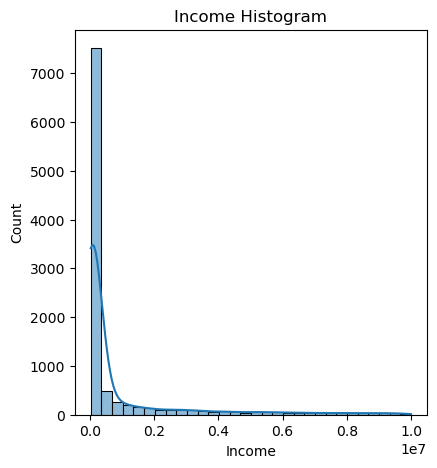

In [13]:
# create histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Income'], kde=True, bins = 30)
plt.title('Income Histogram')

From the histogram, it can be seen that the data is very skewed. More than half the data have income of less than USD100,000 when maximum value is near USD1,000,000. 

---
## 4.2. Age: Distribution, Grouping, Income for Each Age Group

Data is categorized based on age group. Classification is based off [https://www.statcan.gc.ca/en/concepts/definitions/age2](https://www.statcan.gc.ca/en/concepts/definitions/age2).

Text(0.5, 1.0, 'Age Histogram')

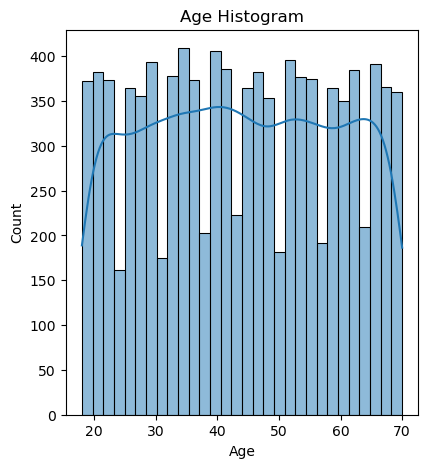

In [14]:
# create histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, bins = 30)
plt.title('Age Histogram')

From the histogram, it can be understood that the data is distributed equally, and it has a pattern that goes on continuously throughout data.

Data scientist will now group data based on age group categories obtained from [reference](https://www.statcan.gc.ca/en/concepts/definitions/age2).

In [15]:
# create empty list
age_group = []

# create looping for values in 'Age' column
for i in df['Age']:
  # create conditions
  if i in range (0, 14):
    age_group.append('Children')
  elif i in range(15, 24):
    age_group.append('Youth')
  elif i in range(25, 64):
    age_group.append('Adult')
  else:
    age_group.append('Senior')

# create new column and insert looping results
df['age_group'] = age_group

Based on age group categories, data scientist will show pie chart to visualize age group distribution in data.

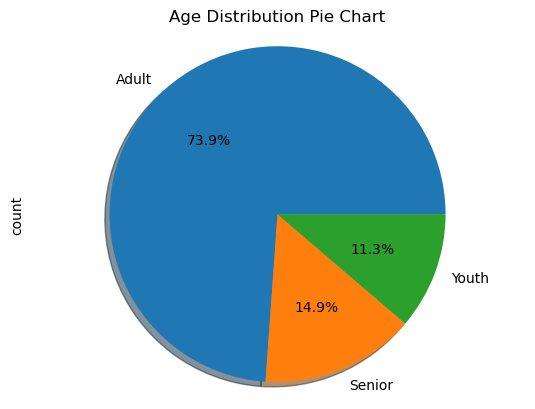

In [16]:
agegroup_counts = df['age_group'].value_counts(dropna=False)
agegroup_counts.plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Age Distribution Pie Chart')
plt.axis('equal')
plt.show()

After grouping data based on age group with [reference](https://www.statcan.gc.ca/en/concepts/definitions/age2), it was found that the majority of household have primary member who are adults. Those who are seniors and in their youths combined make up around a quarter of data.

Now, data scientist will compare average annual household income based on age groups.

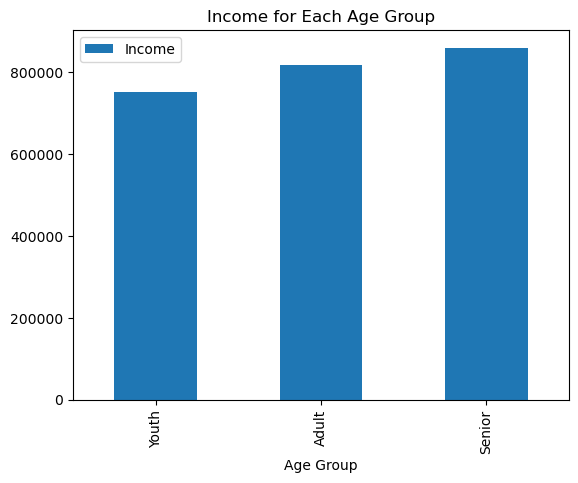

In [17]:
# create new table for visualization purposes
table_eda2 = df.loc[df.age_group != '0', ['age_group', 'Income']].groupby('age_group').mean().sort_values('Income').reset_index()

# visualize data
table_eda2.plot(kind='bar', x='age_group', y='Income', xlabel='Age Group')
plt.title('Income for Each Age Group')
plt.show()

***From the bar chart, it can be understood that there is significant difference in average annual household income based on primary member's age group.*** Those in age group 'senior' have highest average annual income, followed by 'adult', and 'youth', although the difference is not very high. All age groups have average income in range USD700,000 to USD800,000.

---
## 4.3. Work Experience: Distribution, Grouping, Income for Each Group

Text(0.5, 1.0, 'Work Experience Histogram')

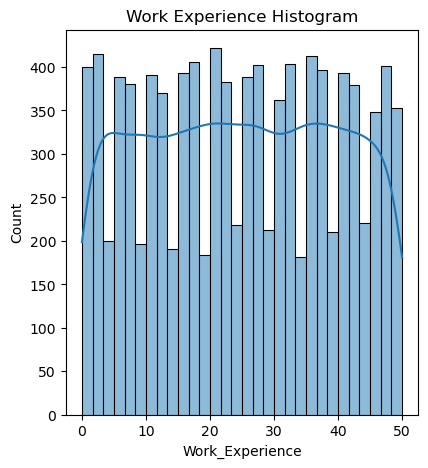

In [18]:
# create histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Work_Experience'], kde=True, bins = 30)
plt.title('Work Experience Histogram')

From the histogram, it can be understood that the data is distributed equally and the distribution has a pattern that goes continuously throughout data.

Now, data scientist will group data based on work experience quartiles.

In [19]:
# show statistical summary for 'Work_Experience' column
df['Work_Experience'].describe()

count    10000.000000
mean        24.858800
std         14.652622
min          0.000000
25%         12.000000
50%         25.000000
75%         37.000000
max         50.000000
Name: Work_Experience, dtype: float64

In [20]:
# create empty list
experience_group = []

# create looping for values in 'Work_Experience' column
for i in df['Work_Experience']:
  # create conditions
  if 0 < i <= 12: # 0 is minimum value in data, 12 is first quartile in data
    experience_group.append('Little experience')
  elif 12 < i <= 25: # 12 is first quartile in data, 25 is second quartile in data
    experience_group.append('Intermediate')
  elif 25 < i <= 37: # 25 is second quartile in data, 37 isi third quartile in data
    experience_group.append('Moderately experienced')
  else:
    experience_group.append('Very experienced')

# create new table and insert looping results
df['experience_group'] = experience_group

Data scientist will compare average income for the groups made.

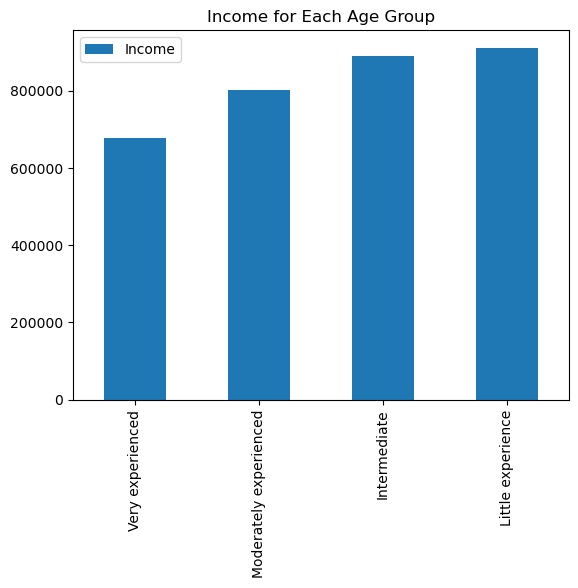

In [21]:
# create new table for visualization purposes
table_eda3 = df.loc[df.experience_group != '0', ['experience_group', 'Income']].groupby('experience_group').mean().sort_values('Income').reset_index()

# visualize data
table_eda3.plot(kind='bar', x='experience_group', y='Income', xlabel='')
plt.title('Income for Each Age Group')
plt.show()

***From the bar chart, it can be understood that there is a significant difference in average annual household income between different work experience groups.*** Households with primary members who have little experience the highest average income. Meanwhile, households with lowest average annual income are households with primary members who are very experienced. The groups have an order with the highest being 'very experienced' and lowest being 'little experience'. However, the order of the groups is not the same for household income context.

---
## 4.4. Household Size: Distribution, Grouping, Income for Each Group

Text(0.5, 1.0, 'Household Size Histogram')

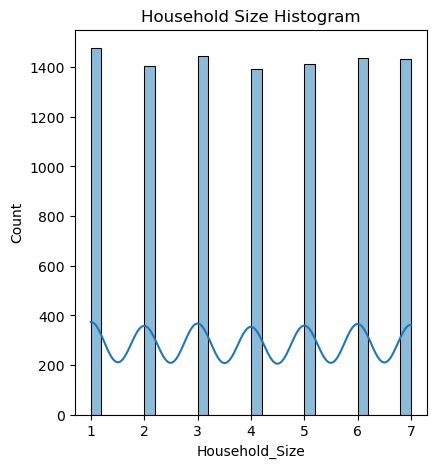

In [22]:
# create histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Household_Size'], kde=True, bins = 30)
plt.title('Household Size Histogram')

From the histogram, it can be understood that the 'Household_Size' are distributed quite equally, with all of them having around 1,400 data.

Now, data scientist will group data based on household size quartiles.

In [23]:
# show statistical summary for 'Household_Size' column
df['Household_Size'].describe()

count    10000.000000
mean         3.989600
std          2.010496
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Household_Size, dtype: float64

In [24]:
# create empty list
householdsize_group = []

# create looping for values in 'Household_Size' column
for i in df['Household_Size']:
  # create conditions
  if 0 < i <= 2: # 0 is minimum value in data, 2 is first quartile in data
    householdsize_group.append('Small household')
  elif 2 < i <= 6: # 2 is first quartile in data, 6 is thirs quartile in data
    householdsize_group.append('Medium household')
  else:
    householdsize_group.append('Big household')

# create new column and insert looping results
df['householdsize_group'] = householdsize_group

Data scientist will compare average income for the groups made.

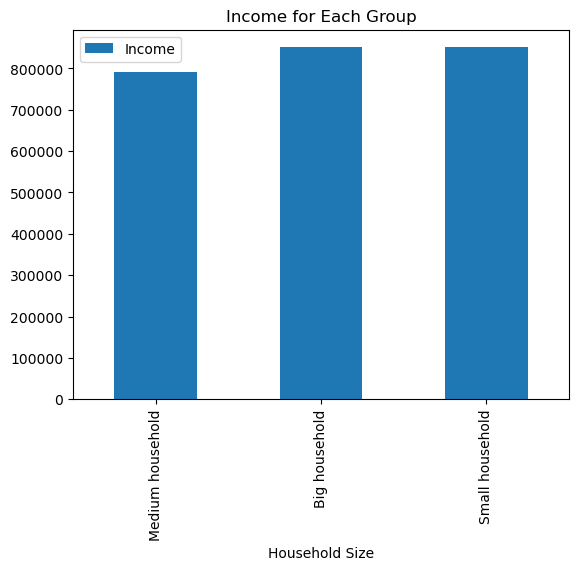

In [25]:
# create new table for visualization purposes
table_eda4 = df.loc[df.householdsize_group != '0', ['householdsize_group', 'Income']].groupby('householdsize_group').mean().sort_values('Income').reset_index()

# visualize data
table_eda4.plot(kind='bar', x='householdsize_group', y='Income', xlabel='Household Size')
plt.title('Income for Each Group')
plt.show()

***From the bar chart, it can be understood that there is no significant difference in average annual household income amongst groups made based on household size.*** All of them have average annual income of around USD800,000.

---
## 4.5. Number of Dependents: Distribution, Grouping, Income for Each Group

First, data scientist wants to see the distribution of 'Number_of_Dependents' in data.

Text(0.5, 1.0, 'Number of Dependents Histogram')

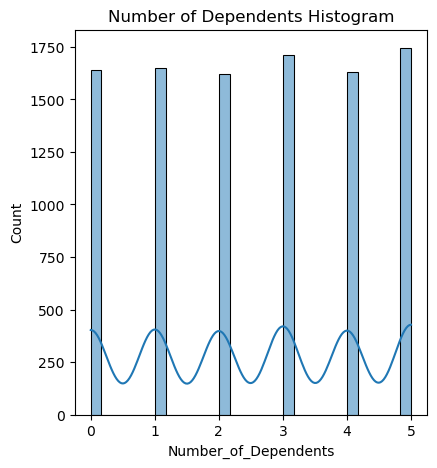

In [26]:
# create histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Number_of_Dependents'], kde=True, bins = 30)
plt.title('Number of Dependents Histogram')

From the histogram, it can be understood that the 'Number_of_Dependents' are distributed quite equally, with all of them having more than 1,500 data.

Now, data scientist will group data based on column values quartiles.

In [27]:
# show statistical summary fro column 'Number_of_Dependents'
df['Number_of_Dependents'].describe()

count    10000.000000
mean         2.527000
std          1.713991
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Number_of_Dependents, dtype: float64

In [28]:
# create empty list 
ndependents_group = []

# create looping for all values in 'Number_of_Dependents' column
for i in df['Number_of_Dependents']:
  # create conditions
  if 0 < i <= 3: # 0 is minimum value in data, 3 is second quartile in data
    ndependents_group.append('Little')
  elif 3 < i <= 4: # 3 is second quartile in data, 4 is third quartile in data
    ndependents_group.append('Average')
  else:
    ndependents_group.append('Many')
    
# create new table and insert looping results
df['ndependents_group'] = ndependents_group

Data scientist will compare average income for the groups made.

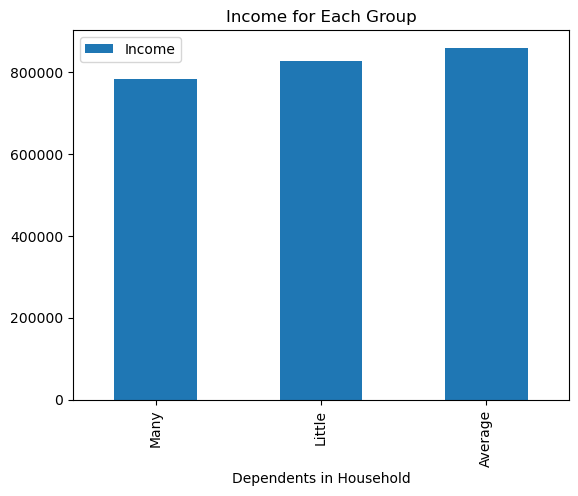

In [29]:
# create new table for visualization purposes
table_eda5 = df.loc[df.ndependents_group != '0', ['ndependents_group', 'Income']].groupby('ndependents_group').mean().sort_values('Income').reset_index()

# visualize data
table_eda5.plot(kind='bar', x='ndependents_group', y='Income', xlabel='Dependents in Household')
plt.title('Income for Each Group')
plt.show()

***From the bar chart, it can be understood that there is no significant difference in average annual household income amongst groups made based on number of dependents in household.*** All of them have average annual income of around USD800,000.

---
## 4.6. Distribution of Categorical Columns in Data

In [30]:
# create dictionary for columns and unique values
dict_eda6 = {'Education_Level': ["Master's", 'High School', "Bachelor's", 'Doctorate'],
             'Occupation': ['Technology', 'Finance', 'Others', 'Education', 'Healthcare'],
             'Location': ['Urban', 'Rural', 'Suburban'],
             'Marital_Status': ['Married', 'Single', 'Divorced'],
             'Employment_Status': ['Full-time', 'Self-employed', 'Part-time'],
             'Homeownership_Status': ['Own', 'Rent'],
             'Type_of_Housing': ['Apartment', 'Single-family home', 'Townhouse'],
             'Gender': ['Male', 'Female'],
             'Primary_Mode_of_Transportation': ['Public transit', 'Biking', 'Car', 'Walking']}

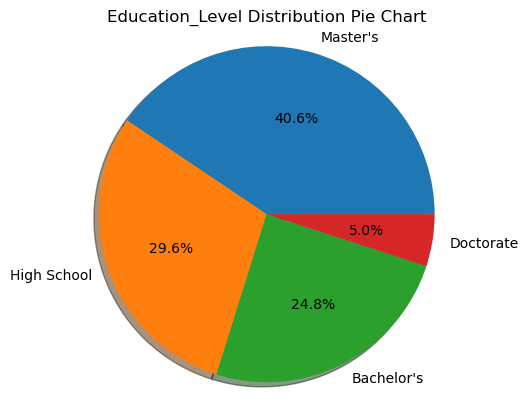

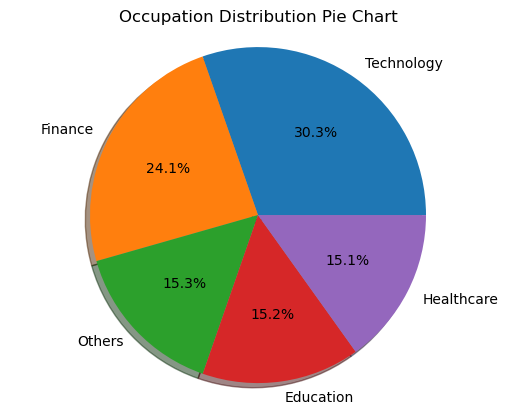

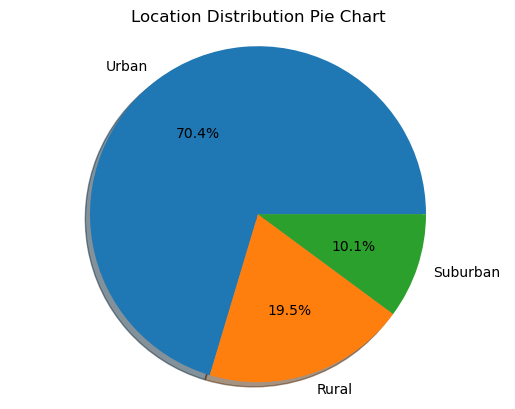

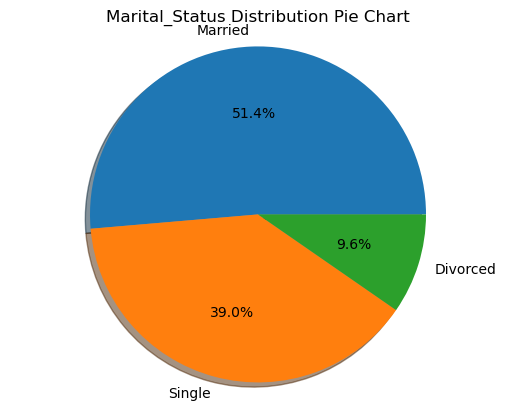

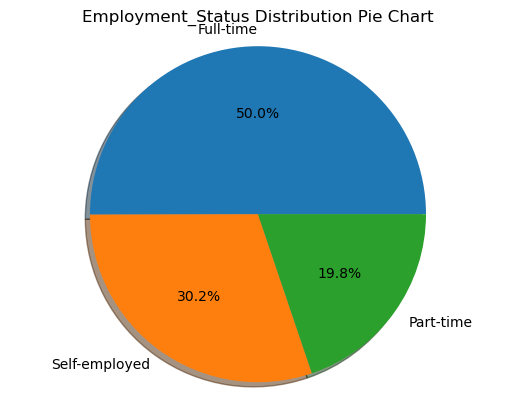

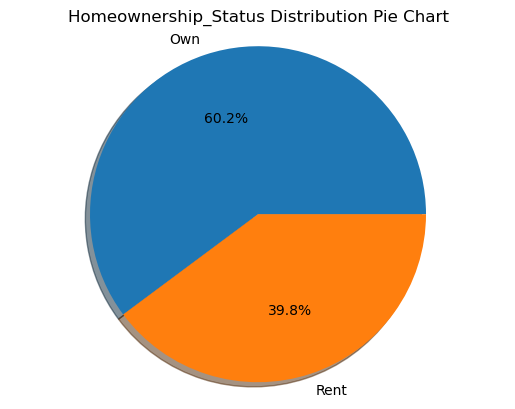

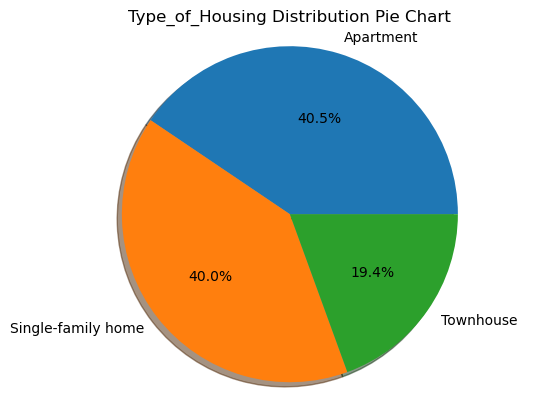

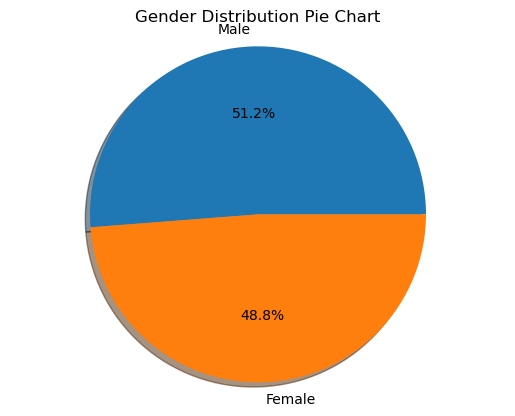

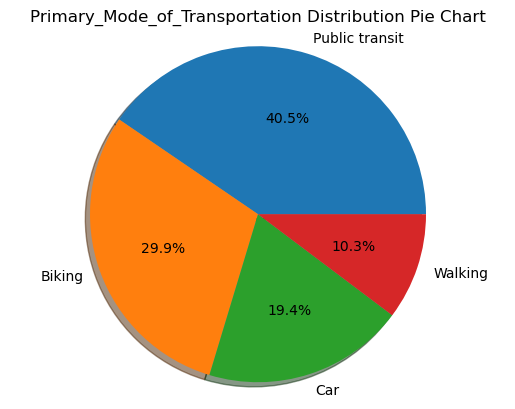

In [31]:
# make looping for columns in list (categorical columns)
for i in ['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']:
    # create new table for visualization purposes
    table_eda6 = df[i].value_counts(dropna=False)
    # show visualization
    plt.pie(table_eda6, autopct='%1.1f%%', labels=dict_eda6[i], shadow=True)
    plt.title(f'{i} Distribution Pie Chart')
    plt.axis('equal')
    plt.show()

`Education Level`

***The distribution in household primary member's education level is not equal.*** Many of them developed achieved highest education level of Master's degree, having around 40%, followed by High School diploma and Bachelor's degree with similar percentages. Lastly, only 5% of household's primary member have attained a Doctorate's degree. 

`Occupation`

***The distribution in household primary member's occupation field is not equal.*** Many of them developed a career in finance and technology with similar percentages. The three other fields are distributed quite equally with each having around 15%, half of those in finance and technology.

`Location`

***From the pie chart, it can be understood that the distribution in household location is not equal.*** There are far more household located in urban areas than those in rural and suburban areas, having percentage of around 70%. 

`Marital Status`

***From the pie chart, it can be understood that the distribution in marital status of household's primary member is not equal.*** Half of the data have primary household members who are married. Meanwhile, only nearly a tenth of data have primary household members are divorced.

`Employment Status`

***From the pie chart, it can be understood that the distribution in employment status of household's primary member is not equal.*** Half of the data have primary household members who are employed full-time. Meanwhile, only nearly a fifth of data have primary household members are employed part-time.

`Homeownership Status`

***From the pie chart, it can be understood that the distribution in homeownership status is not equal.*** Between owning and renting a place, more households do the first choice with ratio of around 60:40.

`Type of Housing`

***From the pie chart, it can be understood that the distribution in type of housing is not equal.*** Households in apartments and single-family homes almost have the same amount. But, those in townhouses are only half the amount of household in apartments.

`Gender`

***From the pie chart, it can be understood that the distribution between gender of household's primary member in data is almost equal.*** The ratio is nearly 50:50, but there are a little more primary household members who are males with diffreence of only 2.4%.

`Primary Mode of Transportation`

***From the pie chart, it can be understood that the primary mode of transportation is not distributed evenly in  data.*** More primary members of household prefer to commute with public transit, followed by biking, car, and walking. The difference is quite significant where the percentage of primary household members who walks are almost a quarter of those who use public transit.

---
## 4.7. Income Based on Education Level, Location, Marital Status, and Homeownership Status

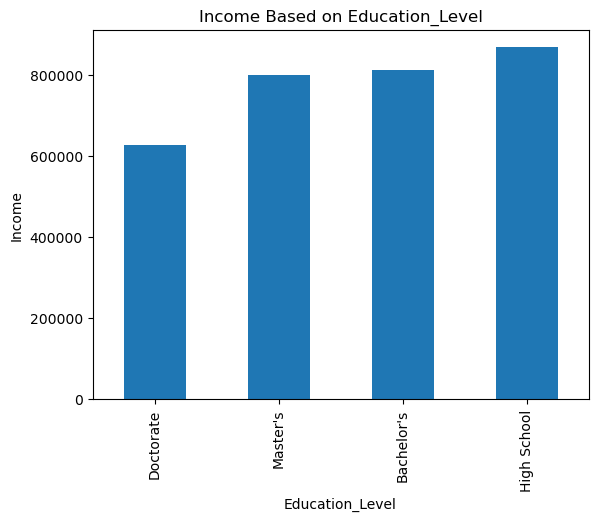

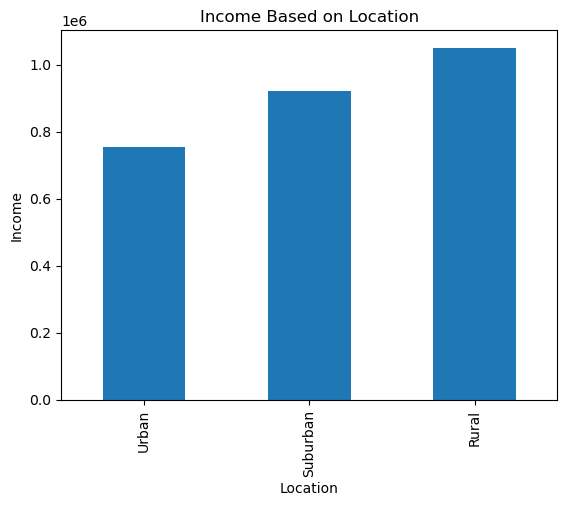

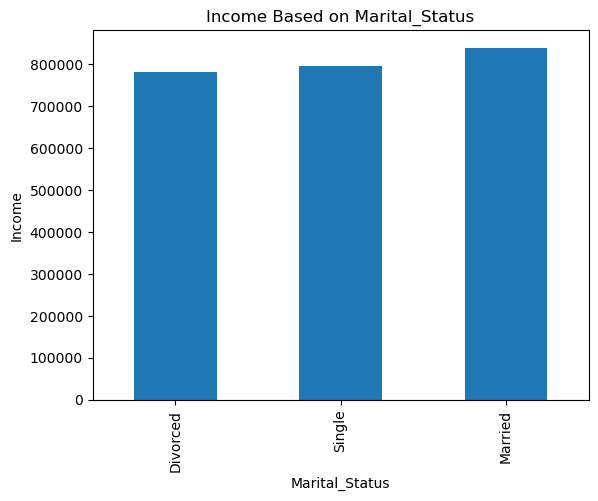

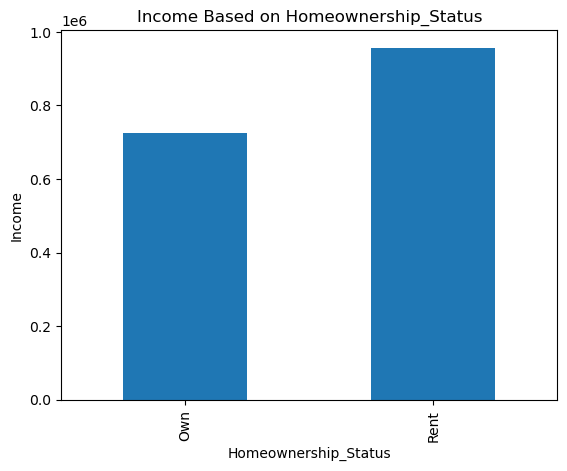

In [32]:
# make looping for columns in list
for i in ['Education_Level', 'Location', 'Marital_Status', 'Homeownership_Status']:
    # create new table for visualization purposes
    table_eda7 = df.loc[df.Employment_Status != '0', [i, 'Income']].groupby(i).mean().sort_values('Income').reset_index()
    # visualize data
    table_eda7.plot(kind='bar', x=i, y='Income', ylabel='Income', legend=False)
    plt.title(f'Income Based on {i}')
    plt.show()

`Education Level`

***From the bar graph, it can be understood that there is significant difference in average income based on primary household member's education level.*** Households with primary members who attained highest education level of high school degree have the highest average income. Meanwhile, households with lowest average annual income are households with primary members who attained highest education level of Doctorate's degree. Education level have an order with the highest being Doctorate and lowest being High School. However, the order of education level is not the same for household income context.

`Location`

***From the bar graph, it can be understood that there is significant difference in average income based on residential location.*** Households located in rural areas have the highest average annual household income amongst other settings. Meanwhile, those in urban areas have the lowest average annual income.

`Marital Status`

***From the bar graph, it can be understood that there is no significant difference in average income based on primary household member's marital status.*** All three categories have average annual household income of around USD800,000.

`Homeownership Status`

***From the bar graph, it can be understood that there is significant difference in average income based on homeownership status.*** Households that are still on rent have higher average annual household income than those who own a home with difference of around USD200,000.

---

## 4.8. Business Insight Based on EDA

- The income of households in data aren't distributed equally. Most of the households have income of less than USD100,000 when the maximum values is near USD1,000,000.
- Age affects income. Those in age group 'senior' have highest average annual income, followed by 'adult', and 'youth', although the difference is not very high. 
- Education level, location, and homeownership status have significant effect on income. 

`Conclusion`

***Data scientist recommends for governmental organization to focus on optimizing controllable variables that affect household income***, such as education level. The organization can allocate funds and give scholarships to students with potential so that they can pursue higher education, and therefore get higher chance to pursue a great career and income. 

---
---

# 5. Feature Engineering

## 5.1. Drop Columns Used for EDA

In [33]:
# drop 'age_group'
df.drop(columns=['age_group', 'experience_group', 'householdsize_group', 'ndependents_group'], inplace=True)

---

## 5.2. Outliers Handling (Label)

Label is skewed and has outliers. So, outliers in label will be handled by data scientist to optimize model performance.

Text(0.5, 1.0, 'Income Histogram')

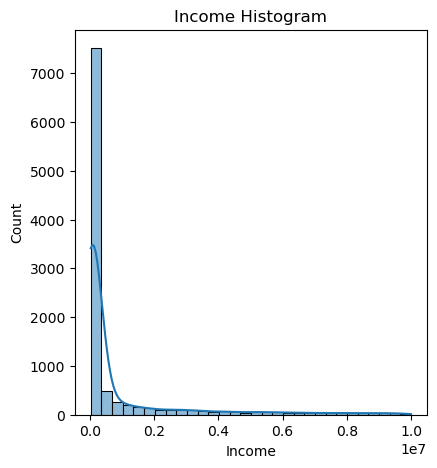

In [34]:
# create histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Income'], kde=True, bins = 30)
plt.title('Income Histogram')

From the histograms above, data scientist will assume that data will 'Income' of above 100,000 are outliers.

In [35]:
# define outliers
outliers = df[df['Income'] > 100000]
df.drop(outliers.index, inplace=True)

Text(0.5, 1.0, 'Income Histogram')

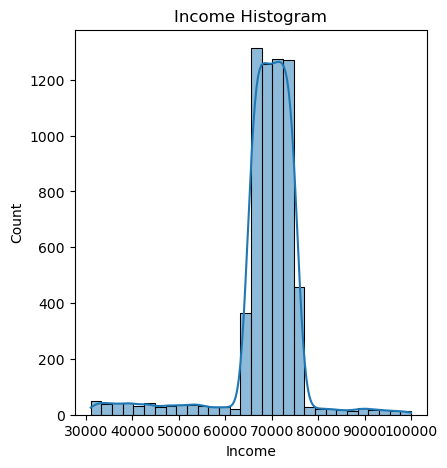

In [36]:
# create histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Income'], kde=True, bins = 30)
plt.title('Income Histogram')

---
## 5.3. Split Feature (x) and Label (y)

In [37]:
# split data to x (feature) and y (label)
x = df.drop('Income', axis=1)
y = df['Income']

# check data shape
print(x.shape)
print(y.shape)

(6613, 13)
(6613,)


---

## 5.4. Split Training and Testing Data

In [38]:
# split data x and y data to x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# check data shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5290, 13)
(1323, 13)
(5290,)
(1323,)


---

## 5.5. Missing Values Handling

In [39]:
# check for missing values
print('x_train missing values: ', x_train.isnull().sum().sum())
print('x_test missing values: ', x_test.isnull().sum().sum())
print('y_train missing values: ', y_train.isnull().sum().sum())
print('y_test missing values: ', y_test.isnull().sum().sum())

x_train missing values:  0
x_test missing values:  0
y_train missing values:  0
y_test missing values:  0


There are no missing values. Data scientist will proceed to the next step.

---

## 5.6. Split Categorical and Numerical Columns

In [40]:
# make list of categorical and numerical column names
cat_col = ['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']
num_col = ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']

In [41]:
# split data
x_train_cat = x_train[cat_col]
x_train_num = x_train[num_col]
x_test_cat = x_test[cat_col]
x_test_num = x_test[num_col]

---

## 5.7. Outliers Handling (Features)

In [42]:
# check data skewness before outlier handling
print(x_train_num.skew())

Age                     0.006408
Number_of_Dependents    0.009014
Work_Experience        -0.064647
Household_Size          0.005077
dtype: float64


Features are quite symmetric because the skewness is still in range of -0.5 to 0.5. It can be said that there are little to no outliers.

---

## 5.8. Selection

Data scientist will use phi-k matrix to select features that will be proceeded to the next steps. From phi-k matrix, data scientist can see correlation between features and label, then eliminate features with low correlation towards label.

Let's first see the phi-k matrix.

In [43]:
# combine features and y_train so correlation can be calculated 
corr_table = pd.concat([x_train_num, x_train_cat, y_train], axis=1)

# make correlation matrix
phik_corr = corr_table.phik_matrix(interval_cols=df['Income'])
phik_corr

,Age,Number_of_Dependents,Work_Experience,Household_Size,Education_Level,Occupation,Location,Marital_Status,Employment_Status,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
Age,1.000000,0.000000,0.000000,0.114624,0.000000,0.059084,0.000000,0.000000,0.000000,0.000000,0.035566,0.000000,0.085612,0.283963
Number_of_Dependents,0.000000,1.000000,0.024742,0.031092,0.000000,0.011909,0.040179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Work_Experience,0.000000,0.024742,1.000000,0.000000,0.070916,0.000000,0.117247,0.000000,0.089106,0.137974,0.058196,0.000000,0.000000,0.280996
Household_Size,0.114624,0.031092,0.000000,1.000000,0.000000,0.009918,0.000000,0.000000,0.000000,0.011224,0.031932,0.000000,0.000000,0.000000
Education_Level,0.000000,0.000000,0.070916,0.000000,1.000000,0.000000,0.026744,0.000000,0.000000,0.099327,0.017309,0.036016,0.000000,0.134653
Occupation,0.059084,0.011909,0.000000,0.009918,0.000000,1.000000,0.051747,0.000000,0.000000,0.010155,0.000000,0.026194,0.000000,0.000000
Location,0.000000,0.040179,0.117247,0.000000,0.026744,0.051747,1.000000,0.000000,0.028761,0.033686,0.031242,0.000000,0.000000,0.119201
Marital_Status,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.011120,0.190776
Employment_Status,0.000000,0.000000,0.089106,0.000000,0.000000,0.000000,0.028761,0.000000,1.000000,0.009597,0.100459,0.000000,0.000000,0.064137
Homeownership_Status,0.000000,0.000000,0.137974,0.011224,0.099327,0.010155,0.033686,0.000000,0.009597,1.000000,0.015065,0.000000,0.019058,0.324474


Data scientist will now create looping to eliminate features with correlation of less than 0.1 with label.

In [44]:
# make looping for categorical columns
for i in x_train_cat.columns.tolist():
    # make condition for features with low correlation to label
    if phik_corr[i]['Income'] <= 0.1:
        # drop column
        x_train.drop(i, axis=1, inplace=True)
        x_train_cat.drop(i, axis=1,  inplace=True)
        x_test.drop(i, axis=1, inplace=True)
        x_test_cat.drop(i, axis=1, inplace=True)

# make looping for numerical columns
for i in x_train_num.columns.tolist():
    # make condition for features with low correlation to label
    if phik_corr[i]['Income'] <= 0.1:
        # drop column
        x_train.drop(i, axis=1, inplace=True)
        x_train_num.drop(i, axis=1,  inplace=True)
        x_test.drop(i, axis=1, inplace=True)
        x_test_num.drop(i, axis=1, inplace=True)

In [45]:
# check data shape after dropping columns
print(x_train.shape)
print(x_train_cat.shape)
print(x_train_num.shape)
print(x_test.shape)
print(x_test_cat.shape)
print(x_test_num.shape)

(5290, 6)
(5290, 4)
(5290, 2)
(1323, 6)
(1323, 4)
(1323, 2)


After feature selection, it can be seen that some features were dropped because they were deemed as redundant for next processes.

---

## 5.9. Cardinality Check

In [46]:
x_train_cat.nunique()

Education_Level         4
Location                3
Marital_Status          3
Homeownership_Status    2
dtype: int64

No categorical columns have number of unique values of more than 10. So, data scientist will proceed to next step.

---

In [47]:
# check skewness for numerical columns
for i in x_train_num.columns:
    print(f'Skew - {i}: {x_train[i].skew()}')

Skew - Age: 0.006408120839065933
Skew - Work_Experience: -0.06464679324871436


Data in numerical columns have low skewness, so data scientist will assume that they are normal distribution. So, StandardScaler will be used.

In [48]:
# define scaler
scaler = StandardScaler()

---
## 5.10. Feature Encoding

Now, data scientist will analyze each categorical column and decide which encoder to use.

In [49]:
x_train_cat['Education_Level'].unique()

array(["Master's", "Bachelor's", 'High School', 'Doctorate'], dtype=object)

In [50]:
x_train_cat['Location'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [51]:
x_train_cat['Marital_Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [52]:
x_train_cat['Homeownership_Status'].unique()

array(['Own', 'Rent'], dtype=object)

'Marital_Status' will be encoded with OneHotEncoder because there is order between marital statuses 'Married', 'Single', and 'Divorced'. 'Homeownership_Status' and 'Type_of_Housing' will also be encoded with OneHotEncoder for the same reason. 'Location' will be encoded with OneHotEncoder because although 'Urban', 'Suburban', and 'Rural' can be perceived as having certain order, but the level of location will not affect household income.

Meanwhile, 'Education_Level' will be encoded with OrdinalEncoder.

In [53]:
# define encoder
ohe = OneHotEncoder()
ordinal = OrdinalEncoder(categories =[['High School', "Bachelor's", "Master's", 'Doctorate']])

In [54]:
ohe_cols = x_train_cat[['Location', 'Marital_Status', 'Homeownership_Status']]
ordinal_cols = x_train_cat['Education_Level']

In [55]:
# define preprocessing to combine scaler and encoder in one variable
preprocessing = ColumnTransformer([
    ('numerical', scaler, x_train_num.columns),
    ('categorical_ohe', ohe, ohe_cols.columns) ,
    ('categorical_ordinal', ordinal, ['Education_Level'])
],remainder='drop')

---
---

# 6. Model Definition

Data scientist will now define pipelines that include preprocessing and model algorithms.

Model algorithms used are:
| Model Algorithm | Reason Used by Data Scientist|
| :---: | :---: |
| Linear Regression | Linear Regression is simple and efficient for regression cases. |
| KNN | KNN is quite easy to use, and there are only few parameters to be set and tuned. |
| SVR | SVR can be used for non linear data. |
| Decision Tree | Decision Tree can be used for non linear data, and it has high accuracy. |
| Random Forest | Random Forest is an implementation of Decision Tree, but its results are aggregated. So, it can be used for non linear data as well, and it has high accuracy. It also can reduce variance. |
| AdaBoost | AdaBoost is efficient and has high accuracy. |
| GradientBoost | GradientBoost has high accuracy and it can handle complex data. GradientBoost can reduce bias error in model, which can also minimize overfitting or underfitting|

In [56]:
# make pipeline for scaling and defining model algorithms
linreg_pipe = make_pipeline(preprocessing, LinearRegression())
knn_pipe = make_pipeline(preprocessing, KNeighborsRegressor())
svr_pipe = make_pipeline(preprocessing, SVR())
dectree_pipe = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=12))
rf_pipe = make_pipeline(preprocessing, RandomForestRegressor(random_state=12))
ada_pipe = make_pipeline(preprocessing, AdaBoostRegressor())
gradient_pipe = make_pipeline(preprocessing, GradientBoostingRegressor())

---

## Cross Validation

Data scientist will do cross validation to determine which model is the best to use for next steps. Data scientist will use mean absolute error (MAE) as scoring method because it is easier to interpret.

In [57]:
# cross validation for each model
linreg_cv = cross_val_score(linreg_pipe, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
knn_cv = cross_val_score(knn_pipe, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
svr_cv = cross_val_score(svr_pipe, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
dectree_cv = cross_val_score(dectree_pipe, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_cv = cross_val_score(rf_pipe, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
ada_cv = cross_val_score(ada_pipe, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
gradient_cv = cross_val_score(gradient_pipe, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

In [58]:
# looping to find best model
for cv, name in zip([linreg_cv, knn_cv, svr_cv, dectree_cv, rf_cv, ada_cv, gradient_cv],
                    ['linreg', 'knn', 'svr', 'dectree', 'rf', 'ada', 'gradient']):
    print(name)
    print(f'MAE - ALL - Cross Validation: {cv}')
    print(f'MAE - Mean - Cross Validation: {cv.mean()}')
    print(f'MAE - std - Cross Validation: {cv.std()}')
    print(f'MAE - Range - Cross Validation: {cv.mean()-cv.std()} - {cv.mean()+cv.std()}')
    print('-'*50)
    print('')

linreg
MAE - ALL - Cross Validation: [-5102.41582372 -4732.73685798 -4961.22809739 -5175.96459782
 -4598.14673411]
MAE - Mean - Cross Validation: -4914.0984222028155
MAE - std - Cross Validation: 218.62114724565657
MAE - Range - Cross Validation: -5132.719569448472 - -4695.477274957159
--------------------------------------------------

knn
MAE - ALL - Cross Validation: [-5757.49754253 -5657.64820416 -5864.57069943 -6197.42759924
 -5535.19697543]
MAE - Mean - Cross Validation: -5802.46820415879
MAE - std - Cross Validation: 225.5121931075918
MAE - Range - Cross Validation: -6027.980397266382 - -5576.956011051198
--------------------------------------------------

svr
MAE - ALL - Cross Validation: [-5013.47449262 -4647.45662109 -4837.3366508  -4997.74936208
 -4437.74535982]
MAE - Mean - Cross Validation: -4786.752497281408
MAE - std - Cross Validation: 218.9477653844403
MAE - Range - Cross Validation: -5005.700262665849 - -4567.8047318969675
---------------------------------------------

From the Cross Validation test, it was found that SVR algorithm produces the best predictions with smallest MAE score of 4786.752497281408. Therefore, SVR model will be proceeded to be used in later steps.

---
---

# 7. Model Training

SVR model pipeline with default parameters will be trained.

In [59]:
# use pipe to scale and train model
svr_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  Index(['Age', 'Work_Experience'], dtype='object')),
                                                 ('categorical_ohe',
                                                  OneHotEncoder(),
                                                  Index(['Location', 'Marital_Status', 'Homeownership_Status'], dtype='object')),
                                                 ('categorical_ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              "Bachelor's",
                                                                              "Master's",
                                                                              'Doctorate']]),
                                                  ['Education_Level'])])),
                ('svr', SVR())])

---
---

# 8. Model Evaluation

## 8.1. Initial Model Evaluation

SVR model with default parameters will be evaluated and tuned.

First, data scientist will use model to predict y_train and y_test.

In [60]:
# predict label using best model (default parameters)
y_pred_train = svr_pipe.predict(x_train)
y_pred_test = svr_pipe.predict(x_test)

Then, data scientist will use MAE and R2 score to evaluate model. Besides MAE, R2 score is also used because data scientist can know how well model captures variance in data.

In [61]:
print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set : ', mean_absolute_error(y_test, y_pred_test))
print('')

print('R2 - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 - Test Set  : ', r2_score(y_test, y_pred_test))

MAE - Train Set :  4784.637970791836
MAE - Test Set :  4446.988471342917

R2 - Train Set :  -0.019427940344407313
R2 - Test Set  :  -0.013821214058981734


Before tuning, the model is already a good fit because 'Income' data is ranged from 0-100,000 USD. So, a margin of error of around 4,000 is still tolerable. Other than that, the difference between MAE score in train set and test set isn't too significant.

Meanwhile, the R2 score that are negative values for both train and test sets indicate that the model's performance cannot keep up with the trend and variance in data.

---

## 8.2. Hyperparameter Tuning

Data scientist will use GridSearch to tune model in order to obtain best parameters because GridSearch tries every combination that data scientist gives. The target of hyperparameter tuning is to optimize model performance and obtain better MAE and R2 scores.

In [62]:
# define parameters
svr_grid_search_params1 = {
    'svr__kernel': ['rbf', 'sigmoid', 'linear'],
    'svr__C': [0.01, 0.1, 1, 10, 100, 500, 1000],
    'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [63]:
# tuning with GridSearch to find best model
svr_grid1 = GridSearchCV(estimator=svr_pipe,
                         param_grid=svr_grid_search_params1,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='neg_mean_absolute_error')

svr_grid1.fit(x_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Work_Experience'], dtype='object')),
                                                                        ('categorical_ohe',
                                                                         OneHotEncoder(),
                                                                         Index(['Location', 'Marital_Status', 'Homeownership_Status'], dtype='object')),
                                                                        ('categorical_ordinal',
                                                                         OrdinalEncoder(categories=[['High '
                                                                                                     'School',
                                                                                                     "Bachelor's",
                                                                                                     "Master's",
                                                                                                     'Doctorate']]),
                                                                         ['Education_Level'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svr__kernel': ['rbf', 'sigmoid', 'linear']},
             scoring='neg_mean_absolute_error', verbose=2)

In [64]:
# get parameters for best model
svr_grid1.best_params_

{'svr__C': 10, 'svr__gamma': 0.1, 'svr__kernel': 'sigmoid'}

From the first GridSearch process, it has been found that the best c value is 10 and the best gamma value is 0.1. Therefore, data scientist will narrow down the range, but use smaller steps in between numbers. The same will be done with gamma.

For the kernel, data scientist will continue to use 'sigmoid' because it was obtained as the best kernel to use based on the first GridSearch process.

In [65]:
# define parameters for GridSearch
svr_grid_search_params2 = {
    'svr__kernel': ['sigmoid'],
    'svr__C': [5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45],
    'svr__gamma': [0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45]
}

In [66]:
# tuning with GridSearch to find best model
svr_grid2 = GridSearchCV(estimator=svr_pipe,
                         param_grid=svr_grid_search_params2,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='neg_mean_absolute_error')

svr_grid2.fit(x_train, y_train)

Fitting 5 folds for each of 289 candidates, totalling 1445 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Work_Experience'], dtype='object')),
                                                                        ('categorical_ohe',
                                                                         OneHotEncoder(),
                                                                         Index(['Location', 'Marital_Status', 'Homeownership_Status'], dtype='object')),
                                                                        ('categorical_ordinal',
                                                                         OrdinalEncoder(categories=[['High '
                                                                                                     'School',
                                                                                                     "Bachelor's",
                                                                                                     "Master's",
                                                                                                     'Doctorate']]),
                                                                         ['Education_Level'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25,
                                    27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45],
                         'svr__gamma': [0.05, 0.075, 0.1, 0.125, 0.15, 0.175,
                                        0.2, 0.225, 0.25, 0.275, 0.3, 0.325,
                                        0.35, 0.375, 0.4, 0.425, 0.45],
                         'svr__kernel': ['sigmoid']},
             scoring='neg_mean_absolute_error', verbose=2)

In [67]:
# get parameters for best model
svr_grid2.best_params_

{'svr__C': 25, 'svr__gamma': 0.225, 'svr__kernel': 'sigmoid'}

In [68]:
# define best model
grid_best = svr_grid2.best_estimator_
grid_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  Index(['Age', 'Work_Experience'], dtype='object')),
                                                 ('categorical_ohe',
                                                  OneHotEncoder(),
                                                  Index(['Location', 'Marital_Status', 'Homeownership_Status'], dtype='object')),
                                                 ('categorical_ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              "Bachelor's",
                                                                              "Master's",
                                                                              'Doctorate']]),
                                                  ['Education_Level'])])),
                ('svr', SVR(C=25, gamma=0.225, kernel='sigmoid'))])

From the last GridSearch process, it has been found that the best parameters are 25 for c value, 0.225 for gamma, and sigmoid kernel. Large c value means that there is smaller margin, and therefore leads to more complex decision making. But with larger c value, model can avoid errors in train set. Meanwhile, small gamma value means that training sample will have more influence on prediction, which can lead to more generalized boundary.

Now, data scientist will use best model to predict labels.

In [69]:
# use best model to predict label
y_pred_test_grid = grid_best.predict(x_test)
y_pred_train_grid = grid_best.predict(x_train)

---
## 8.3. Final Model Analysis

In [70]:
# compare actual data and prediction results
print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train_grid))
print('MAE - Test Set : ', mean_absolute_error(y_test, y_pred_test_grid))
print('')

print('R2 - Train Set : ', r2_score(y_train, y_pred_train_grid))
print('R2 - Test Set  : ', r2_score(y_test, y_pred_test_grid))

MAE - Train Set :  4786.745130434743
MAE - Test Set :  4448.083152671648

R2 - Train Set :  -0.02022573336559419
R2 - Test Set  :  -0.012742472047123199


The MAE and R2 scores after tuning isn't too different from before.

After tuning, the model is also a good fit because 'Income' data is ranged from 0-100,000 USD. So, a margin of error of around 4,000 is still tolerable. Other than that, the difference between MAE score in train set and test set isn't too significant.

Meanwhile, the R2 score that are negative values for both train and test sets indicate that the model's performance cannot keep up with the trend and variance in data.

Data scientist will now compare model with default parameters and model after tuning.

In [71]:
# create table displaying difference in MAE and R2 scores for before and after tuning
eval_table = pd.DataFrame({'': ['MAE - Train', 'MAE - Test', 'R2 - Train', 'R2 - Test'],
                          'Before Tuning': [mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test), r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)],
                          'After Tuning': [mean_absolute_error(y_train, y_pred_train_grid), mean_absolute_error(y_test, y_pred_test_grid), r2_score(y_train, y_pred_train_grid), r2_score(y_test, y_pred_test_grid)]})
eval_table

,,Before Tuning,After Tuning
0,MAE - Train,4784.637971,4786.745130
1,MAE - Test,4446.988471,4448.083153
2,R2 - Train,-0.019428,-0.020226
3,R2 - Test,-0.013821,-0.012742


After tuning, the model is more of a good fit compared than model before tuning. The difference between MAE score in train and test set before and after tuning is about the same. However, the MAE scores increased after tuning. The same applies for R2 scores.

---

## 8.4. Outlier Analysis

Data scientist will analyze the characteristics of outliers in data (data with income of more than USD100,000).

In [72]:
# show outliers
outliers.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
6,38,Master's,Technology,3,Rural,20,Married,Full-time,4,Rent,Single-family home,Male,Public transit,3584362
9,40,Bachelor's,Education,4,Urban,21,Married,Full-time,6,Own,Apartment,Female,Biking,5188124
12,41,Bachelor's,Technology,4,Rural,21,Married,Full-time,2,Own,Single-family home,Female,Car,9892000
15,57,Bachelor's,Healthcare,4,Rural,38,Married,Self-employed,6,Rent,Apartment,Male,Car,756798


### 8.4.A. Analyze Numerical Columns

In [73]:
# show outliers statistical summary
outliers.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,3387.000000,3387.000000,3387.000000,3387.000000,3.387000e+03
mean,43.996457,2.590198,23.819014,4.002067,2.277325e+06
std,15.000315,1.694227,14.367817,2.013172,2.562574e+06
min,18.000000,0.000000,1.000000,1.000000,1.002480e+05
25%,31.000000,1.000000,11.000000,2.000000,3.313925e+05
50%,44.000000,3.000000,23.000000,4.000000,1.111309e+06
75%,57.000000,4.000000,36.000000,6.000000,3.435987e+06
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


Outliers have wide range of age, work experience, and household size. However, from the statistical summary above data scientist can analyze that outliers relatively don't have high number of dependents. This can be seen from maximum value of column 'Number_of_Dependents', which is 5 and the average value of the same column, which is around 2-3. As an addition, outliers have average age for primary househols member of around 40, and work experience of around 20.

---
### 8.4.B. Analyze Categorical Columns

In [74]:
for i in ['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']:
    print(outliers[i].value_counts())
    print('')

Education_Level
Bachelor's     1388
High School    1063
Master's        823
Doctorate       113
Name: count, dtype: int64

Occupation
Healthcare    1061
Technology     773
Education      575
Others         546
Finance        432
Name: count, dtype: int64

Location
Urban       2248
Suburban     689
Rural        450
Name: count, dtype: int64

Marital_Status
Married     1753
Single      1317
Divorced     317
Name: count, dtype: int64

Employment_Status
Full-time        1662
Part-time        1121
Self-employed     604
Name: count, dtype: int64

Homeownership_Status
Rent    1857
Own     1530
Name: count, dtype: int64

Type_of_Housing
Apartment             1494
Single-family home    1303
Townhouse              590
Name: count, dtype: int64

Gender
Male      1755
Female    1632
Name: count, dtype: int64

Primary_Mode_of_Transportation
Public transit    1373
Car                984
Biking             672
Walking            358
Name: count, dtype: int64



When compared to EDA from earlier processes, it can be analyzed that outliers have different characteristics than overall data. Outliers have less primary household member who have attained Master's degree, and more of them have attained Bachelor's and High School degree. Outliers also have less primary household members who work in finance, and more of them work in the healthcare field. From employment status aspect, there are far more primary household members who work part-time. The ratio between households who rent and own a place are more equally distributed. For the other unmentioned categorical columns, characteristics are quite similar to those in overall data.

---

## 8.5. Model Strengths and Weaknesses

##### `Strengths`

- Model can make predictions with relatively low margin of error (around 4,700).

##### `Weaknesses`

- Model is sensitive to outliers. 
- Model has negative R2 score, which means that model was not able to capture variance in data.

---
## 8.6. Further Improvement

- Try using different model algorithms to make predictions, such as XGBoost for example.
- Try wider range for hyperparameter tuning. As an example, for hyperparameter tuning, data scientist didn't include kernel 'poly'. In next improvement, this kernel could be used.
- Converting this project from regression to classification by classifying the data into some groups, such as low, middle, and high economic status.

---
---

# 9. Model Saving

In [75]:
with open('grid_best.pkl', 'wb') as file_1:
  pickle.dump(grid_best, file_1)

---
---

# 10. Model Inference

Model Inference process is done in another file named `Household_Income_Prediction_Celine_Clarissa_Inference.ipynb`.

---
---

# 11. Conclusion

From the processes that has been done, some results and insights have been obtained. From EDA process, data scientist has identified the characteristics of households in data. Data scientist recommends for governmental organization to focus on controllable variables that affect income in order to improve economic consition of city. Other than that, it was possible to make a model with MAE score of less than 100,000. EDA and model was also successfully deployed on webapp with Hugging Face for interactive use within 7 working days. The organization can continue to plan strategies regarding economic conditions in city using the results from these processes.